<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#특강-:-tensorflow,-keras-개요" data-toc-modified-id="특강-:-tensorflow,-keras-개요-1">특강 : tensorflow, keras 개요</a></span><ul class="toc-item"><li><span><a href="#tensorflow" data-toc-modified-id="tensorflow-1.1">tensorflow</a></span><ul class="toc-item"><li><span><a href="#데이터-타입" data-toc-modified-id="데이터-타입-1.1.1">데이터 타입</a></span></li><li><span><a href="#Linear-Regression(y-=-2x-+-1)-구현" data-toc-modified-id="Linear-Regression(y-=-2x-+-1)-구현-1.1.2">Linear Regression(y = 2x + 1) 구현</a></span></li></ul></li><li><span><a href="#Keras" data-toc-modified-id="Keras-1.2">Keras</a></span></li><li><span><a href="#영화-리뷰-이진-분류" data-toc-modified-id="영화-리뷰-이진-분류-1.3">영화 리뷰 이진 분류</a></span></li></ul></li></ul></div>

# 특강 : tensorflow, keras 개요

## tensorflow

### 데이터 타입

- Constant(상수형)
- Placeholder : Feed할 데이터(학습용 데이터 X)
- Variable(변수형) : 학습을 통해 만들어야 하는 데이터(가중치 W)

### Linear Regression(y = 2x + 1) 구현

In [8]:
import tensorflow as tf

In [9]:
tensorflow.__version__

'1.13.1'

In [12]:
a = tf.constant(3.0)
b = tf.constant(4.0)
c = tf.constant(5.0)
d = a * b * c
print(d)

Tensor("mul_1:0", shape=(), dtype=float32)


In [16]:
sess = tf.Session()
result = sess.run(d)
print(result)

60.0


In [17]:
W = tf.Variable(tf.random_normal(shape=[1], name='w'))
b = tf.Variable(tf.random_normal(shape=[1], name='b'))
x = tf.placeholder(tf.float32)

pred = W * x + b

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
y = tf.placeholder(tf.float32)

loss = tf.reduce_mean(tf.square(pred - y))

In [20]:
optimizer = tf.train.GradientDescentOptimizer(0.01)

train_step = optimizer.minimize(loss)

Instructions for updating:
Use tf.cast instead.


In [22]:
x_train = [1, 2, 3, 4]
y_train = [3, 5, 7, 9]

In [23]:
sess = tf.Session()
result = sess.run(tf.global_variables_initializer())

In [27]:
for i in range(1000):
    sess.run(train_step, feed_dict={x:x_train, y:y_train})

In [28]:
x_test = [3, 5, 5, 6]
print(sess.run(pred, feed_dict={x:x_test}))

[ 6.999552 10.984583 10.984583 12.977098]


## Keras

In [29]:
import keras

In [30]:
keras.__version__

'2.2.4'

In [32]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [34]:
import matplotlib.pyplot as plt

5


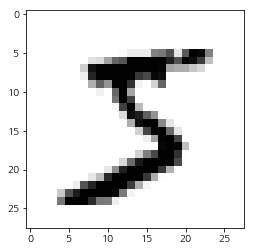

In [35]:
digit = train_images[0]
print(train_labels[0])
plt.imshow(digit, cmap=plt.cm.binary)

In [36]:
from keras import models
from keras import layers

In [37]:
nework = models.Sequential()
nework.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
nework.add(layers.Dense(10, activation='softmax'))

In [38]:
nework.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255    # scale 조정 (0~255 값을 0~1로 조정)

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [41]:
from keras.utils import to_categorical    # One-Hot Vector

In [42]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [45]:
nework.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3907 - acc: 0.8915
Epoch 2/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.3453 - acc: 0.9025
Epoch 3/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.3193 - acc: 0.9089
Epoch 4/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.3013 - acc: 0.9134
Epoch 5/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.2870 - acc: 0.9173


In [46]:
test_loss, test_acc = nework.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 24us/step


In [50]:
print("test_loss:", test_loss)
print("test_accuracy:", test_acc)

test_loss: 0.2739735954463482
test_accuracy: 0.9215


## 영화 리뷰 이진 분류

In [51]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 10s 1us/step


In [54]:
train_data[0]   # 하나의 문장 (각각의 단어는 단어사전에 매핑된 숫자로 표현되어 있음)

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [55]:
train_labels[0]

1

In [57]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])   # key는 단어, value는 index 값
decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])    # 0, 1, 2는 패딩, 문서시작, 사전에 없음을 위한 인덱스 이므로 3을 뺍니다.

1646592/1641221 [==============================] - 3s 2us/step


In [58]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th